# SINGULAR VALUE DECOMPOSITION  


Matrix, each row is related to an object and the columns to the information about the object

In [3]:
import numpy as np
A = np.array([1, 2, 3, 4, 5, 6, 7, 8,
              3, 4, 4, 5, 5, 6, 7, 9,
              1, 8, 2, 7, 3, 6, 4, 5,
              9, 8, 7, 6, 5, 4, 3, 2,
              9, 4, 8, 3, 7, 2, 6, 1,
              2, 3, 2, 4, 2, 5, 2, 6,
              3, 4, 3, 4, 4, 3, 4, 3,
              3, 2, 4, 3, 2, 4, 3, 2,
              5, 5, 4, 4, 6, 6, 2, 2,
              2, 3, 6, 5, 4, 6, 7, 2,
              1, 6, 5, 3, 8, 2, 3, 9,
              1, 6, 5, 3, 8, 2, 3, 9,])
A = A.reshape(12,8)
print(A)

[[1 2 3 4 5 6 7 8]
 [3 4 4 5 5 6 7 9]
 [1 8 2 7 3 6 4 5]
 [9 8 7 6 5 4 3 2]
 [9 4 8 3 7 2 6 1]
 [2 3 2 4 2 5 2 6]
 [3 4 3 4 4 3 4 3]
 [3 2 4 3 2 4 3 2]
 [5 5 4 4 6 6 2 2]
 [2 3 6 5 4 6 7 2]
 [1 6 5 3 8 2 3 9]
 [1 6 5 3 8 2 3 9]]


In [4]:
U, s, V = np.linalg.svd(A, full_matrices=True)

In [5]:
print(U.shape)

(12, 12)


In [6]:
print(V.shape)

(8, 8)


In [7]:
print(s)

[43.66646283 13.70625936  9.40282331  7.84800122  4.25277314  3.48420385
  2.42430878  0.52080746]


As when we are computing the linear correlation could be useful to compute the z-score for each columns. We subtract the mean value in order to have centered data and we divide by the standard deviation.


In [8]:
(nr,nc)=A.shape
e=np.ones((nr,1))
Az=A-np.dot(e,np.mean(A,axis=0).reshape(1,nc))

Az=Az/np.std(A,axis=0)#division by columns (we cannot divide a matrix by a vector, this correspond to multiply by the corresponding diagonal matrix)

print('check mean',np.mean(Az,axis=0))

print('check std', np.std(Az,axis=0))


check mean [-7.40148683e-17  1.29526020e-16 -1.57281595e-16  3.70074342e-17
 -1.11022302e-16  2.22044605e-16  3.70074342e-17  1.11022302e-16]
check std [1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
Uz, sz, Vz = np.linalg.svd(Az, full_matrices=False)

The singular values are different

In [10]:
sz

array([5.65583688, 4.84182086, 4.30048849, 3.84372295, 1.87444342,
       1.52783496, 1.17252503, 0.27792055])

In [11]:
s

array([43.66646283, 13.70625936,  9.40282331,  7.84800122,  4.25277314,
        3.48420385,  2.42430878,  0.52080746])

When the matrix is a sparse matrix it is convinient to subtract the mean only to the elements different from zeros. This  cannot be done if the elements equal to zero have a particular meaning. 


Let us check how many singular values are important

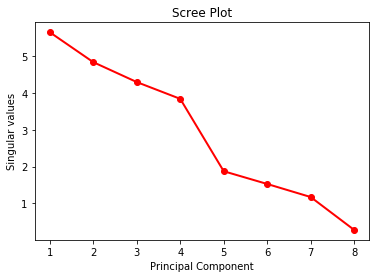

In [12]:
import matplotlib
import matplotlib.pylab as plt
(num_obj, num_attr) = A.shape
fig = plt.figure(figsize=(6,4))
sing_vals = np.arange(num_attr) + 1
plt.plot(sing_vals, sz, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

plt.show()

We compute the entropy.
Entropy measures the amount of disorder in a set of objects; in this case, it has a value between 0 (all variation is captured in the first dimension) and 1 (all dimensions are equally important). The magnitude of the entropy indicates how many dimensions need to be retained.

In [13]:
f=sz**2 / np.sum(sz**2)
r = sz.shape
entropy = -1/np.log(r)*np.sum(f*np.log(f))
print(entropy)
perc=0.7
ks = int(r*entropy*perc)
print('Entropy =',entropy, 'suggested k=', ks,'singular values', sz[0:ks])

[0.76641491]
Entropy = [0.76641491] suggested k= 4 singular values [5.65583688 4.84182086 4.30048849 3.84372295]


In this example we need almost all directions.

We choose k such that the residual matrix of the
k + 1 to m components appears to be a random matrix. 
Suppose a matrix is multiplied pointwise by a random −1, +1 matrix. Its Frobenius norm does not change. If it is a random matrix, that is it contains no structure, only noise, its 2-norm will not change either. However, if it contains structure, altering the signs of its entries will change the 2-norm by an amount that reflects the amount of structure present. Hence the difference of the 2-norms of the
residual matrix and the matrix obtained from it by pointwise multiplication by a random −1, +1 matrix, divided by the Frobenius norm should become small as soon as the residual matrix contains only noise.


In [100]:
res_k = np.zeros(num_attr-1)
resF_k = np.zeros(num_attr-1)
res_kU = np.zeros(num_attr-1)
normFkU = np.zeros(num_attr-1)

for i in range(0,num_attr-1):
    si = sz[0:(i+1)]
    Ak = np.dot(Uz[:,0:(i+1)]*sz[0:(i+1)], Vz[0:(i+1),:] )
    res_k[i] = np.linalg.norm( Ak-Az,2)
    resF_k[i] = np.linalg.norm( Ak-Az)
    diff = (np.dot(Uz[:,(i+1):(num_obj)]*sz[(i+1):(num_attr)], Vz[(i+1):(num_attr),:] ))
    Uk=np.sign(np.random.randn(num_obj,num_attr))
    res_kU[i] = np.linalg.norm( Uk*(diff),2)
    normFkU[i] = np.linalg.norm( Uk*(diff))  

[0.05185742 0.00688669 0.12144467 0.01360551 0.14256979 0.19859918
 0.24540622]


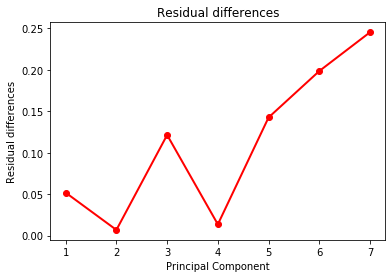

In [101]:
print(abs(res_k-res_kU)/normFkU)
plt.plot(sing_vals[0:(num_attr-1)], abs(res_k-res_kU)/normFkU, 'ro-', linewidth=2)
plt.title('Residual differences')
plt.xlabel('Principal Component')
plt.ylabel('Residual differences')
plt.show()

In [102]:
#B random matrix
B=(np.dot(np.random.randn(num_obj,1),np.random.randn(1,num_attr)))*100;
B=B+(np.dot(np.random.randn(num_obj,1),np.random.randn(1,num_attr)))*100;
B=B+(np.dot(np.random.randn(num_obj,1),np.random.randn(1,num_attr)))*100;

B = B+np.random.rand(num_obj,num_attr)*1e-6 # we add a smaller matrix noise  
(num_obj,num_attr)=B.shape
UB, sB, VB = np.linalg.svd(B, full_matrices=False)
print(num_obj,num_attr)
print(sB)

12 8
[8.89486776e+02 6.96996442e+02 4.37862509e+02 3.45186742e-06
 1.26863379e-06 1.17819581e-06 6.63580417e-07 2.99774753e-07]


In [103]:
res_k = np.zeros(num_attr-1)
resF_k = np.zeros(num_attr-1)
res_kU = np.zeros(num_attr-1)
normFkU = np.zeros(num_attr-1)
for i in range(0,num_attr-1):
    Bk = np.dot(UB[:,0:(i+1)]*sB[0:(i+1)], VB[0:(i+1),:] )
    res_k[i] = sB[i+1]
    resF_k[i] = np.linalg.norm( Bk-B)
    diff = (np.dot(UB[:,(i+1):(num_obj)]*sB[(i+1):(num_attr)], VB[(i+1):(num_attr),:] ))
    Uk=np.sign(np.random.randn(num_obj,num_attr))
    res_kU[i] = np.linalg.norm( Uk*(diff),2)
    normFkU[i] = np.linalg.norm( Uk*(diff))
    

[1.03238217e-01 2.41619872e-01 6.85357308e-07 1.13398730e-07
 2.70959586e-07 1.67827029e-07 9.09266892e-08]


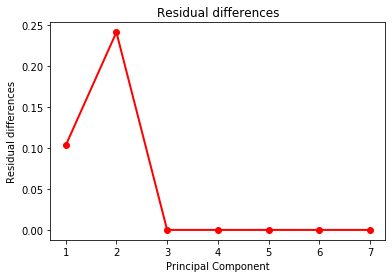

In [104]:
print(abs(res_k-res_kU)/(1+normFkU))
plt.plot(sing_vals[0:(num_attr-1)], abs(res_k-res_kU)/(1+normFkU), 'ro-', linewidth=2)
plt.title('Residual differences')
plt.xlabel('Principal Component')
plt.ylabel('Residual differences')
plt.show()

In [105]:
# standardized matrix compute the z-score
(nr,nc)=B.shape
e=np.ones((nr,1))
Bz=B-np.dot(e,np.mean(B,axis=0).reshape(1,nc))
Bz=Bz/np.std(B,axis=0)
num_obj=nr
num_attr=nc
UBz, sBz, VBz = np.linalg.svd(Bz, full_matrices=True)
resF_k = np.zeros(num_attr-1)
res_kU = np.zeros(num_attr-1)
normFkU = np.zeros(num_attr-1)
for i in range(0,num_attr-1):
    Bk = np.dot(UBz[:,0:(i+1)]*sBz[0:(i+1)], VBz[0:(i+1),:] )
    res_k[i] = sBz[i+1]   
    Uk=np.sign(np.random.randn(num_obj,num_attr))
    res_kU[i] = np.linalg.norm( Uk*(Bk-Bz),2)
for i in range(0,num_attr-1):
    Bk = np.dot(UBz[:,0:(i+1)]*sBz[0:(i+1)], VBz[0:(i+1),:] )
    res_k[i] = np.linalg.norm( Bk-Bz,2)
    resF_k[i] = np.linalg.norm( Bk-Bz)
    diff = (np.dot(UBz[:,(i+1):(num_attr)]*sBz[(i+1):(num_attr)], VBz[(i+1):(num_attr),:] ))
    Uk=np.sign(np.random.randn(num_obj,num_attr))
    res_kU[i] = np.linalg.norm( Uk*(diff),2)
    normFkU[i] = np.linalg.norm( Uk*(diff))
    print(res_k[i],res_kU[i],resF_k[i],normFkU[i])
   

5.316347957574841 4.7807842346744405 7.003414922347249 7.003414922347248
4.558976307083195 3.4990271034076788 4.558976307083197 4.558976307083196
1.459558080334093e-08 1.2202559537103711e-08 1.9869169977981688e-08 1.9869169937469922e-08
9.673131893443588e-09 8.468351932978837e-09 1.3481577663890688e-08 1.348157761884519e-08
8.00049611345752e-09 6.420895238000406e-09 9.390604700943084e-09 9.390604530248834e-09
4.006904345451909e-09 3.339647983354207e-09 4.916860674015152e-09 4.91686064715503e-09
2.84960275680995e-09 2.2444204075872783e-09 2.8496027568140825e-09 2.8496029195782445e-09


[6.85216604e+00 5.31634796e+00 4.55897631e+00 1.45955808e-08
 9.67313195e-09 8.00049591e-09 4.00690427e-09 2.84960292e-09]


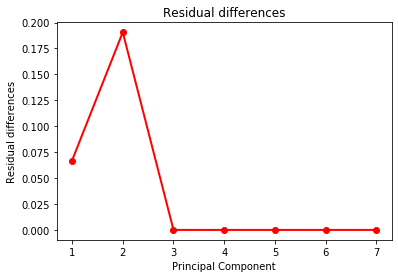

In [106]:
print(sBz)
plt.plot( sing_vals[0:(num_attr-1)], abs(res_k-res_kU)/(1+normFkU), 'ro-', linewidth=2)
plt.title('Residual differences')
plt.xlabel('Principal Component')
plt.ylabel('Residual differences')
plt.show()

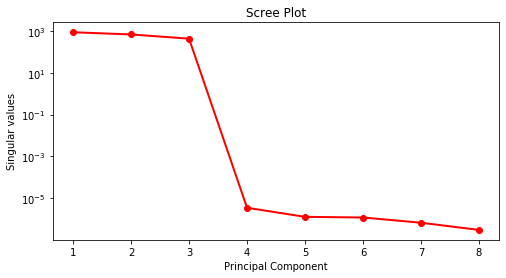

In [107]:

fig = plt.figure(figsize=(8,4))
sing_vals = np.arange(num_attr) + 1
plt.semilogy(sing_vals, sB, 'ro-', linewidth=2,)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

plt.show()

In [108]:
f=sBz**2 / np.sum(sBz**2)
r = sBz.shape
entropy = (-1/np.log(r))*np.sum(f*np.log(f))
ks = int(r*entropy)
print('Entropy =',entropy, 'suggested k=', int(r*entropy), sBz[0:ks])
print(entropy)
perc=0.9
ks = int(r*entropy*perc)
print('Entropy =',entropy, 'suggested k=', ks,'singular values', sBz[0:ks])

Entropy = [0.50065588] suggested k= 4 [6.85216604e+00 5.31634796e+00 4.55897631e+00 1.45955808e-08]
[0.50065588]
Entropy = [0.50065588] suggested k= 3 singular values [6.85216604 5.31634796 4.55897631]


In [109]:
#Cumulative percentage of total variation
t = 100.*np.cumsum(sBz**2.0)/np.sum(sBz**2.0)
ts = 99.
print(t)
print(t<=ts)
kt = np.argmin(t <= ts)
print(kt+1,sBz[0:(kt+1)])


[ 48.90852023  78.34972399 100.         100.         100.
 100.         100.         100.        ]
[ True  True False False False False False False]
3 [6.85216604 5.31634796 4.55897631]


In [110]:
sBz

array([6.85216604e+00, 5.31634796e+00, 4.55897631e+00, 1.45955808e-08,
       9.67313195e-09, 8.00049591e-09, 4.00690427e-09, 2.84960292e-09])

In [111]:
#Kaiser rule 
t = sBz**2
meanvar= np.sum(sBz**2)/len(sBz)
print( t< meanvar)
kt = np.argmax(t < meanvar)
print(kt,sBz[0:kt])

[False False False  True  True  True  True  True]
3 [6.85216604 5.31634796 4.55897631]
